Text(0, 0.5, "$\\theta'$")

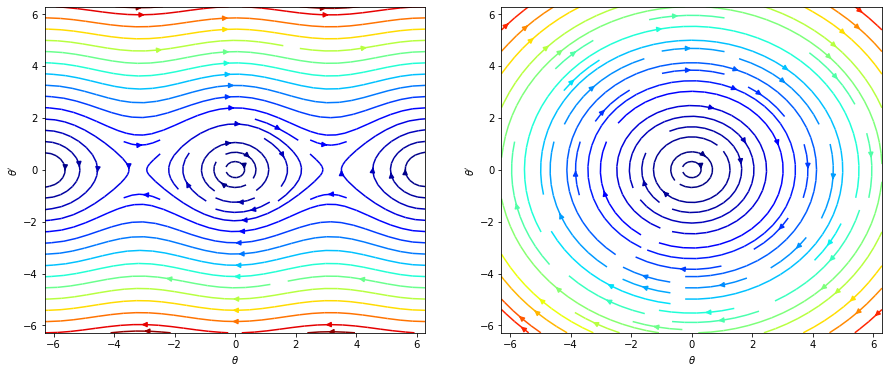

In [2]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-2*np.pi, 2*np.pi, 41)
y = np.linspace(-2*np.pi, 2*np.pi, 41)
X, Y = np.meshgrid(x, y)
dX = Y

dY1 = -np.sin(X)
energy1 = 0.5*Y**2 -np.cos(X)

dY2 = -X
energy2 = 0.5*(X**2 + Y**2)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.streamplot(X,Y,dX, dY1, color=energy1, density=1., cmap='jet', arrowsize=1)
ax2.streamplot(X,Y,dX, dY2, color=energy2, density=1., cmap='jet', arrowsize=1)

ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r"$\theta'$")
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel(r"$\theta'$")

#fig.savefig('3_faseplott')

#### Eulers metode - Retningsfelt

81


Text(475.7454545454544, 0.5, '$x$')

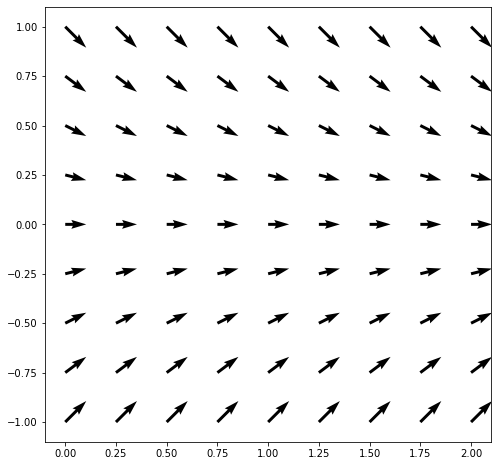

In [10]:
h = 1
x = np.linspace(0, 2, 9)
y = np.linspace(-1, 1, 9)
X, Y = np.meshgrid(x, y)

def f(t,x):
    return -x
    #return t-x

def sol(t,x0):
    return x0*np.exp(-t)
    #return t-1 + np.exp(-t)*(1+x0)

dX = X**0
dY = f(X,Y)

print(np.size(X))
h = 1
x0 = 0

fig1, ax = plt.subplots(figsize=(8,8))

#fig2, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
m = 1
ax.quiver(X,Y,dX,dY)
#ax1.quiver(X[::m,::m],Y[::m,::m],dX[::m,::m],dY[::m,::m])
ax1.set_xlabel(r'$t$',size=12)
ax1.set_ylabel(r"$x$",size=12,rotation=0)

t_fine = np.linspace(0,2,101)

ax1.plot(t_fine[:-7],sol(t_fine[:-7],0))
ax1.plot(t_fine[:-19],sol(t_fine[:-19],1))
ax1.plot(t_fine,sol(t_fine,-1))

ax2.streamplot(X,Y,dX,dY)
ax2.set_xlabel(r'$t$',size=12)
ax2.set_ylabel(r"$x$",size=12,rotation=0)

#fig1.savefig('3_retningsfelt2.png')

153


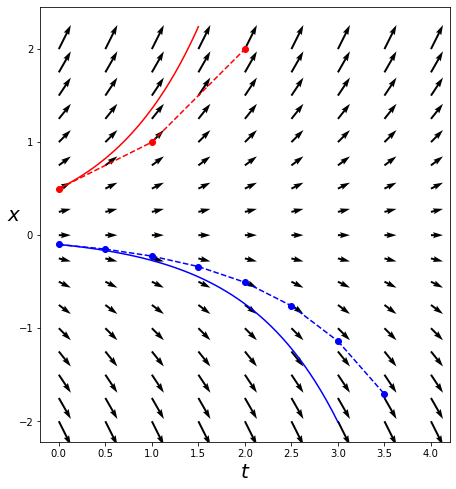

In [82]:
x = np.linspace(0, 4, 9)
y = np.linspace(-2, 2, 17)
X, Y = np.meshgrid(x, y)

def f(t,x):
    return x

dX = X**0
dY = f(X,Y)

print(np.size(X))
h = 1
x0 = 0.5
plt1, ax1 = plt.subplots(figsize=(8,8))
ax1.quiver(X,Y,dX,dY)
ax1.set_xlabel(r'$t$',size=20)
ax1.set_ylabel(r"$x$",size=20,rotation=0)
ax1.set_aspect('equal')

tk1 = np.linspace(0,1.5,51)
ax1.plot(tk1,0.5*np.exp(tk1),'red')
tk2 = np.linspace(0,3,51)
ax1.plot(tk2,-0.1*np.exp(tk2),'blue')

x0 = 0.5
xold = x0

ax1.plot(0,x0,marker='o',color='red')
for k in range(0,2):
    tk = k*h
    xnew = xold + h*f(tk,xold)
    ax1.plot([k*h,(k+1)*h],[xold,xnew],'red',linestyle='dashed')
    ax1.plot((k+1)*h,xnew,marker='o',color='red')
    xold = xnew

x0 = -0.1
xold = x0
h = 0.5

ax1.plot(0,x0,marker='o',color='blue')
for k in range(0,7):
    tk = k*h
    xnew = xold + h*f(tk,xold)
    ax1.plot([k*h,(k+1)*h],[xold,xnew],color='blue',linestyle='dashed')
    ax1.plot((k+1)*h,xnew,marker='o',color='blue')
    xold = xnew
    
#plt1.savefig('3_retningsfeltEuler.png')

#### Eulers metode - stabilitet

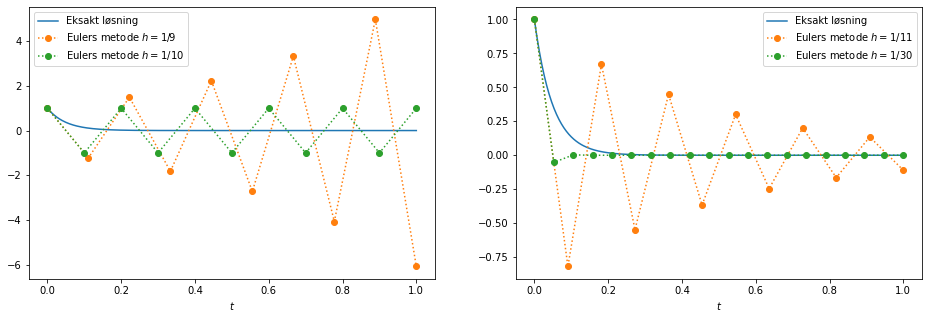

In [87]:
T = 1.0 # stopptid
x0 = 1 # startverdi
lam = -20.0 # lambda

N1 = 9 # antall steg
N2 = 10
N3 = 11
N4 = 30

h1 = T/N1 # steglengde
h2 = T/N2
h3 = T/N3
h4 = T/N4

x1 = np.zeros(N1+1)
x1[0] = x0

x2 = np.zeros(N2+1)
x2[0] = x0

x3 = np.zeros(N3+1)
x3[0] = x0

x4 = np.zeros(N4+1)
x4[0] = x0

for k in range(0,N1):
    x1[k+1] = x1[k] + lam*h1*x1[k]

for k in range(0,N2):
    x2[k+1] = x2[k] + lam*h2*x2[k]
    
for k in range(0,N3):
    x3[k+1] = x3[k] + lam*h3*x3[k]
    
for k in range(0,N4):
    x4[k+1] = x4[k] + lam*h4*x4[k]

t1 = np.linspace(0,T,N1+1)
t2 = np.linspace(0,T,N2+1)
t3 = np.linspace(0,T,N3+1)
t4 = np.linspace(0,T,N4+1)

tm = np.linspace(0,T,301) # jevnt fordelte punkter for plott av eksakt løsning

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(tm,np.exp(lam*tm)) # eksakt løsning
ax1.plot(t1,x1,':o')
ax1.plot(t2,x2,':o')
ax1.set_xlabel('$t$')
ax1.legend([r"Eksakt løsning",r"Eulers metode $h=1/9$",r"Eulers metode $h=1/10$"])

ax2.plot(tm,np.exp(lam*tm)) # eksakt løsning
ax2.plot(t3,x3,':o')
ax2.plot(t4,x4,':o')
ax2.set_xlabel('$t$')
ax2.legend([r"Eksakt løsning",r"Eulers metode $h=1/11$",r"Eulers metode $h=1/30$"])

#fig.savefig('3_stabilitet.png')